# Visualizing vector fields

https://www.numbercrunch.de/blog/2013/05/visualizing-vector-fields/

## Example 1

$$
\mathbf{F}(\mathbf{r}) = \frac{e^{-r^2}}{r} (-y \hat{x} + x \hat{y})
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

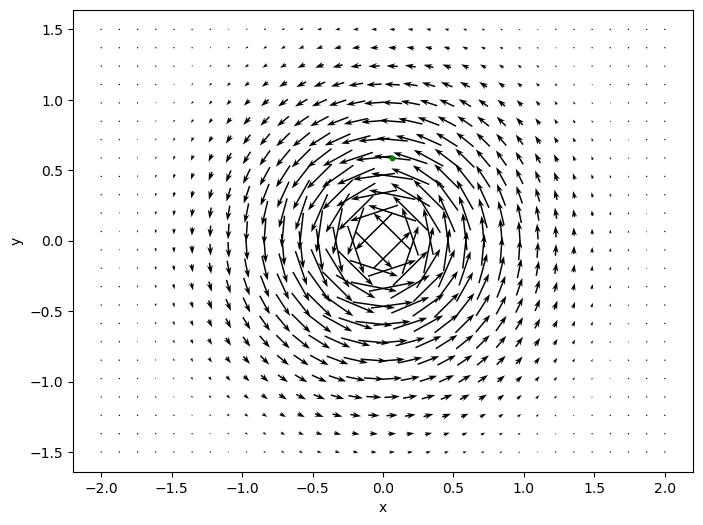

In [ ]:
x = np.linspace(-2, 2, 32)
y = np.linspace(-1.5, 1.5, 24)
x, y = np.meshgrid(x, y)
r = np.hypot(x, y)
factor = np.exp(-r**2)/r
Fx = - y * factor
Fy = x * factor

# middle (see a green dot)
plt.figure(figsize=(8, 6))
plt.quiver(x, y, Fx, Fy, pivot='middle', headwidth=4, headlength=6)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.scatter(x[16,16], y[16,16], color='green', s=10)
plt.show()

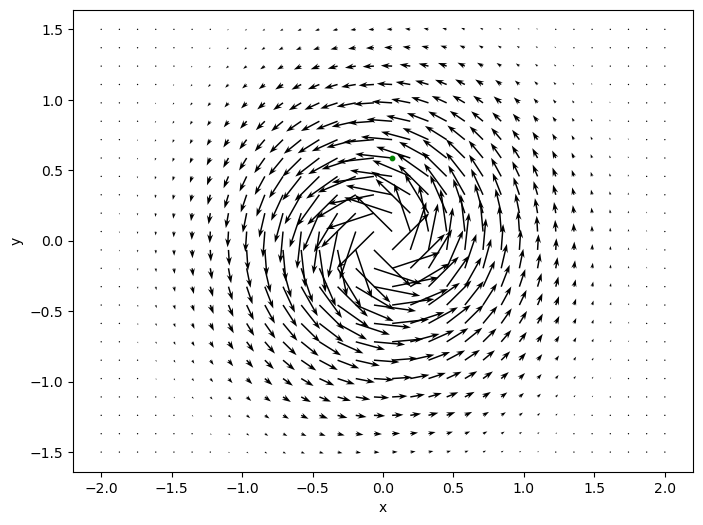

In [ ]:
# tail (see a green dot)
plt.figure(figsize=(8, 6))
plt.quiver(x, y, Fx, Fy, pivot='tail', headwidth=4, headlength=6)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.scatter(x[16,16], y[16,16], color='green', s=10)
plt.show()

## Example 2

$$
\mathbf{E}(\mathbf{r}) = \frac{q}{4\pi\varepsilon_0} \left( \frac{\mathbf{r}-\mathbf{r_+}}{|\mathbf{r}-\mathbf{r_+}|^3} - \frac{\mathbf{r}-\mathbf{r_-}}{|\mathbf{r}-\mathbf{r_-}|^3} \right)
$$

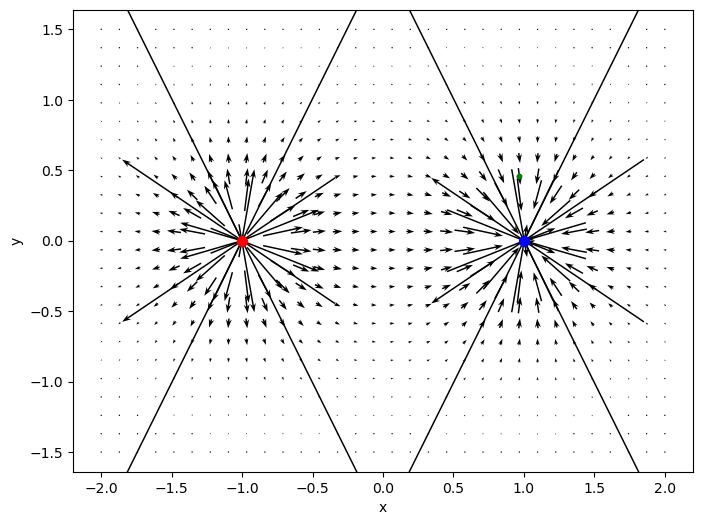

In [ ]:
x = np.linspace(-2, 2, 32)
y = np.linspace(-1.5, 1.5, 24)
x, y = np.meshgrid(x, y)

def E(q, a, x, y):
    den = np.hypot(x-a[0], y-a[1])**3
    Ex = q * (x - a[0]) / den
    Ey = q * (y - a[1]) / den
    return Ex, Ey

# Calculate electric field (Superposition principle)
Ex1, Ey1 = E(1, (-1, 0), x, y)
Ex2, Ey2 = E(-1, (1, 0), x, y)
Ex = Ex1 + Ex2
Ey = Ey1 + Ey2

# middle
plt.figure(figsize=(8, 6))
plt.quiver(x, y, Ex, Ey, pivot='middle', headwidth=4, headlength=6)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.scatter(x[23, 23], y[15, 15], color='green', s=10)
plt.scatter(-1, 0, color='red', s=50)
plt.scatter(1, 0, color='blue', s=50)
plt.show()

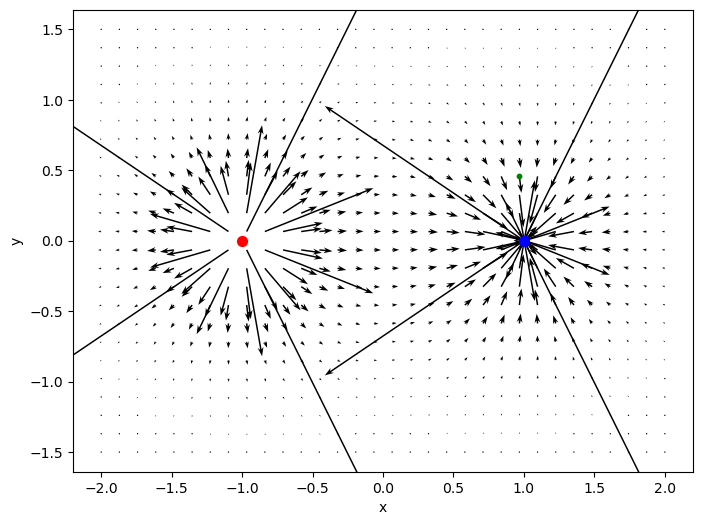

In [ ]:
# tail
plt.figure(figsize=(8, 6))
plt.quiver(x, y, Ex, Ey, pivot='tail', headwidth=4, headlength=6)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.scatter(x[23, 23], y[15, 15], color='green', s=10)
plt.scatter(-1, 0, color='red', s=50)
plt.scatter(1, 0, color='blue', s=50)
plt.show()

### Normalizing all vectors

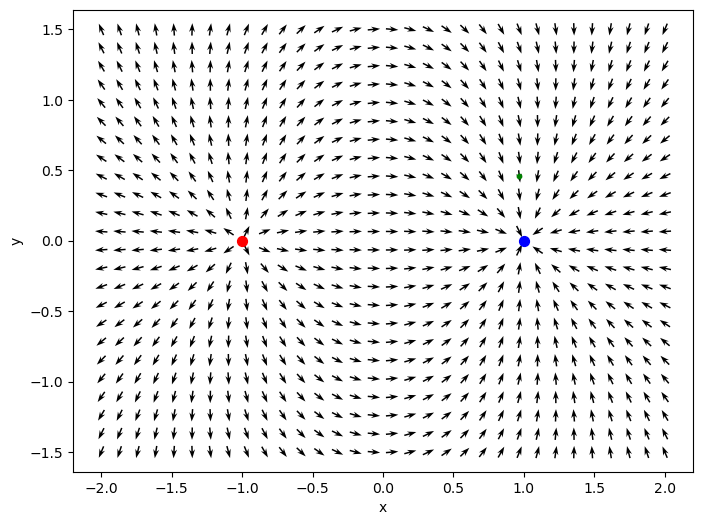

In [ ]:
x = np.linspace(-2, 2, 32)
y = np.linspace(-1.5, 1.5, 24)
x, y = np.meshgrid(x, y)

def E(q, a, x, y):
    den = np.hypot(x-a[0], y-a[1])**3
    Ex = q * (x - a[0]) / den
    Ey = q * (y - a[1]) / den
    return Ex, Ey

# Calculate electric field (Superposition principle)
Ex1, Ey1 = E(1, (-1, 0), x, y)
Ex2, Ey2 = E(-1, (1, 0), x, y)
Ex = Ex1 + Ex2
Ey = Ey1 + Ey2

# Normalize electric field
Emag = np.hypot(Ex, Ey)
Ex = Ex / Emag
Ey = Ey / Emag

# middle
plt.figure(figsize=(8, 6))
plt.quiver(x, y, Ex, Ey, pivot='middle', headwidth=4, headlength=6)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.scatter(x[23, 23], y[15, 15], color='green', s=10)
plt.scatter(-1, 0, color='red', s=50)
plt.scatter(1, 0, color='blue', s=50)
plt.show()

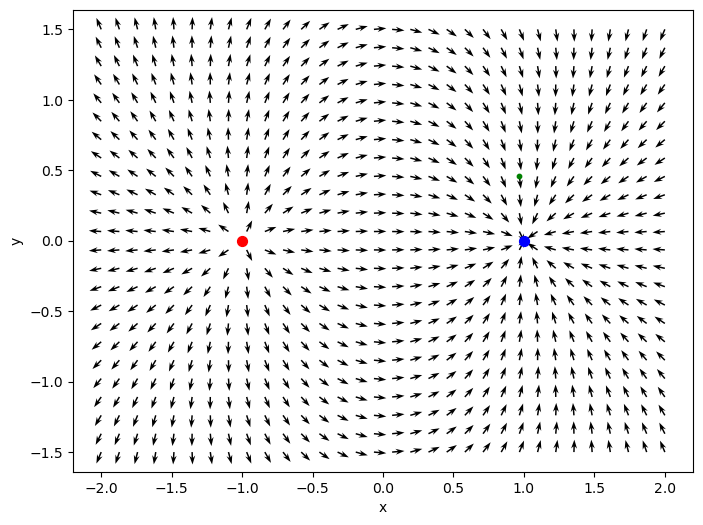

In [ ]:
# tail
plt.figure(figsize=(8, 6))
plt.quiver(x, y, Ex, Ey, pivot='tail', headwidth=4, headlength=6)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.scatter(x[23, 23], y[15, 15], color='green', s=10)
plt.scatter(-1, 0, color='red', s=50)
plt.scatter(1, 0, color='blue', s=50)
plt.show()

### Getting rid of extremely long vectors

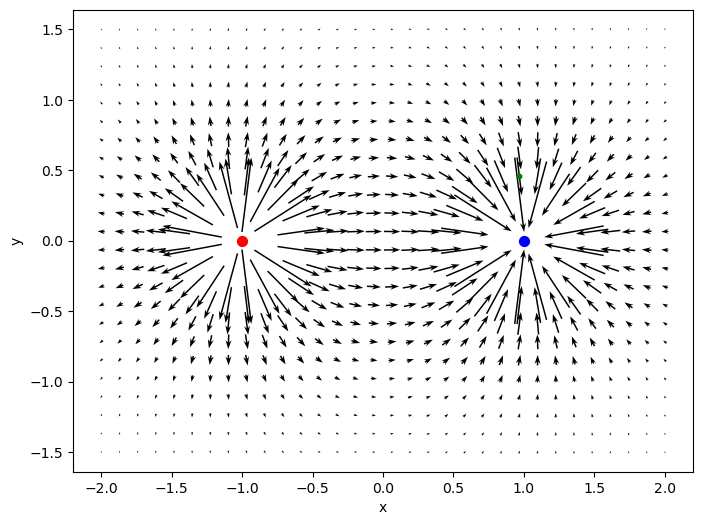

In [ ]:
x = np.linspace(-2, 2, 32)
y = np.linspace(-1.5, 1.5, 24)
x, y = np.meshgrid(x, y)

def E(q, a, x, y):
    den = np.hypot(x-a[0], y-a[1])**3
    Ex = q * (x - a[0]) / den
    Ey = q * (y - a[1]) / den
    return Ex, Ey

# Calculate electric field (Superposition principle)
Ex1, Ey1 = E(1, (-1, 0), x, y)
Ex2, Ey2 = E(-1, (1, 0), x, y)
Ex = Ex1 + Ex2
Ey = Ey1 + Ey2

# Remove vector with length larger than E_max
E_max = 10
Emag = np.hypot(Ex, Ey)
mask = Emag > E_max
Ex[mask] = np.nan
Ey[mask] = np.nan

# middle
plt.figure(figsize=(8, 6))
plt.quiver(x, y, Ex, Ey, pivot='middle', headwidth=4, headlength=6)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.scatter(x[23, 23], y[15, 15], color='green', s=10)
plt.scatter(-1, 0, color='red', s=50)
plt.scatter(1, 0, color='blue', s=50)
plt.show()

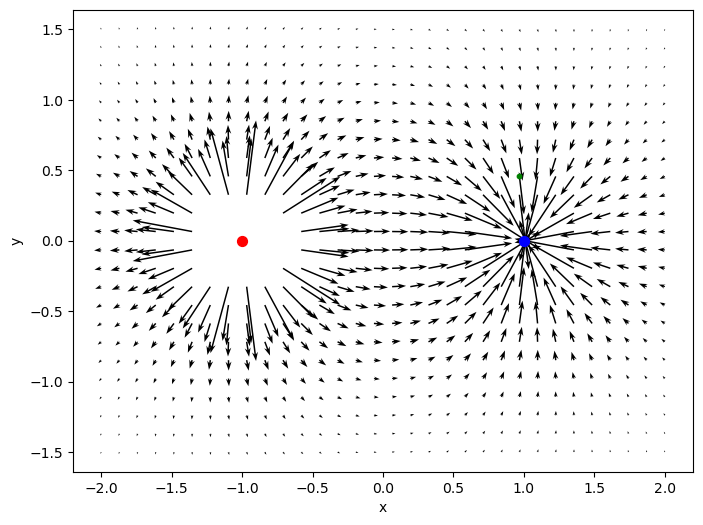

In [ ]:
# tail
plt.figure(figsize=(8, 6))
plt.quiver(x, y, Ex, Ey, pivot='tail', headwidth=4, headlength=6)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.scatter(x[23, 23], y[15, 15], color='green', s=10)
plt.scatter(-1, 0, color='red', s=50)
plt.scatter(1, 0, color='blue', s=50)
plt.show()